In [142]:
#config matplotlib to not use dynamic figures
%matplotlib inline
#config matplotlib backend to generate low weight pngs
%config InlineBackend.figure_format = 'png'
#initialize workspace
%run _init.py



# ANOVA

**AN**anlysis **O**f **Va**riance is a type of main effects testing, an omnibus effects test if you will, which compares a statistic, the $\mathcal{F}$-statistic, with a expected distribution (the Null distribution). In the case of ANOVA, that Null distribution is called the $\mathcal{F}$ distribution, the big $\mathcal{F}$ in the sky.

---

Recall that: $\mathcal{F}=\frac{Var_{between}}{Var_{Within}}$

We typically define variability as the **sum of squares**, i.e. $\sum(\ldots{})^2$, which is the sum of **distances** between two points, so then in place of $Var_{\ldots}$, we write $SS_{\ldots}$. Now let's define the **$SS$ distances** we need in order to analyze the variance of multiple groups.

Thus,
$$\mathcal{F}=\frac{Var_{between}}{Var_{Within}}=\frac{SS_{between}}{SS_{Within}}$$

**The variability between groups is the sum of the variance of the group means about the Grand Mean ($\mu_{grand}$):**

$SS_{between} = n_a (\bar{a} - \overline{abc})^2 + n_b (\bar{b} - \overline{abc})^2 +n_c (\bar{c} - \overline{abc})^2$


Or more generally:

\begin{equation}
SS_{between} = \sum(\hat{y}-\bar{y})^2 = \partial^2(fit,\, null)
\end{equation}

**The variability within groups is the sum of the group variances:**

$SS_{within} = \sum_{i}^{n_a}(a_i - \bar{a})^2 + \sum_{i}^{n_b}(b_i - \bar{b})^2 + \sum_{i}^{n_c}(c_i - \bar{c})^2$

Or more generally:

\begin{equation}
SS_{within} = \sum(y-\hat{y})^2 = \partial^2(data,\, fit)
\end{equation}

\begin{equation}
\therefore\, \mathcal{F} = \frac{\partial^2(fit,\, null)}{\partial^2(data,\, fit)}
\end{equation}

To give these equations some meanings, let's define a few terms in a way
that applies to our data. For $\hat{y}$, this is the general term for
group means$^1$. The next term, $\bar{y}$, is the general term for the Grand Mean ($\mu_{grand}$. Finally,
$y$, without any modifiers, is the general term for each data point and can be considered to represet $y_i$.
Here we use $\partial^2$ to denote a geometric distance between the concepts of data, fit and null.

Importantly, the term **fit** is used to reflect the idea of **expected** value. If you had a Normally distributed variable, the **expected** value would be the value that all other valeus tend to, would be the mean. Of course, this can be any of our summary statistics, such as the median, but the theory relies on the mean... Good thing we all know better!


---
$^1$ Another way to think of this is the points to the line fit through the different groups.

## Degrees of Freedom (how free are we?)

When the F-statistic is scaled (or you can think of it is *standardized*, by a "degrees of freedom" term:

$$\mathcal{F}= \frac{SS_{betwen}/df_{between}}{SS_{within}/df_{within}} = \frac{MS_{between}}{MS_{within}}$$

where $df_{between}=k-1$ and $df_{within}=N-k$, given that $N$ is the total number of samples and $k$ is the number of different groups. You'll notice that if we include the $df$'s, what we are doing to the $SS_{(\ldots)}$ is making them avearged sum of squares, that is we are taking the **Mean Sum of Squares**, thus we represent it by $MS_{Within}$ and $MS_{Between}$.

If we assume a balanced design, then it follows that $F$ is distributed as ![F-Distribution][F-Dist], where $\mathcal{F}$ is a function of $df$'s. For our purposes though, bootstrapping these values doesn't require the Degrees of Freedom to produce a consistent result.

[F-Dist]:https://upload.wikimedia.org/wikipedia/commons/7/74/F-distribution_pdf.svg "F distribution"

### Geometric visualizations

Statistic:
$$\mathcal{F}=\frac{\color{lightblue}{\partial^2(fit,null)}}{\color{red}{\partial^2(fit,data)}}$$
Effect Size:
$$R^2=\frac{\color{lightblue}{\partial^2(fit,null)}}{\color{seagreen}{\partial^2(data,null)}}$$

RM Statistic:
$$\mathcal{F}=\frac{\color{lightblue}{\partial^2(fit,null)}}{\color{orange}{\partial^2(fit,reduced)}}$$
RM Effect Size:
$$\eta^2=\frac{\color{lightblue}{\partial^2(fit,null)}}{\color{purple}{\partial^2(reduced,null)}}=\frac{SS_{Between}}{SS_{Total}}$$

In [10]:
len(np.arange(21)/10 - 1)

21

In [24]:
axLines = [
  [0,0,0,0,-2,2],
  [0,0,-2,2,0,0],
  [-2,2,0,0,0,0],
];
axLines[0][0:2]

[0, 0]

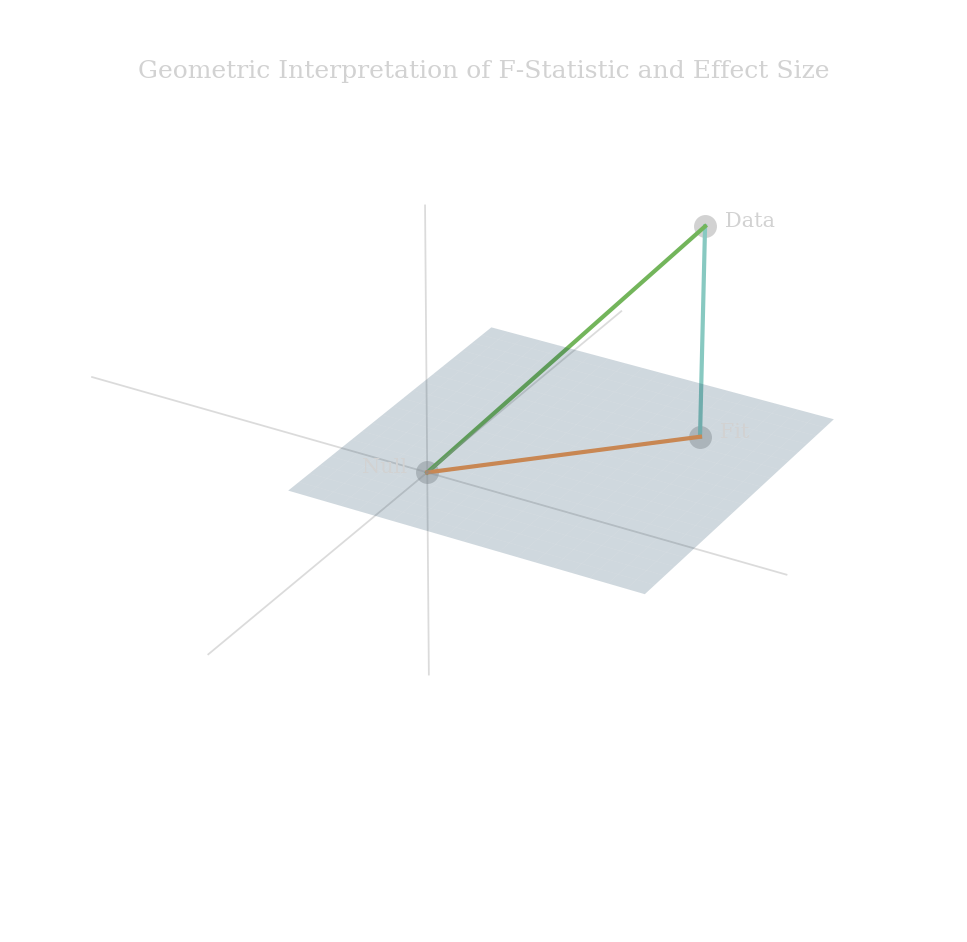

In [144]:
from mpl_toolkits.mplot3d import Axes3D

z = np.zeros((21,21));

xx,yy = np.meshgrid(np.arange(21)/10 - 0.5, np.arange(21)/10 - 0.5);

fig = pyp.figure(figsize=(8,8),dpi=150);
ax = fig.add_subplot(111, projection='3d');

#Add axes lines
axLines = [
  [0,0,-2,2,0,0],
  [-2,2,0,0,0,0],
  [0,0,0,0,-1,1.25]
];
ptData = [
  np.float64([2,2,2])/2, #d
  np.float64([0,0,0])/2, #n
  np.float64([2,2,0])/2 #f
];
ax.plot_surface(xx,yy,z,facecolor=col['satBlue'], alpha=0.2);

# datfit line
ax.plot([ptData[0][0],ptData[2][0]], [ptData[0][1],ptData[2][1]], [ptData[0][2],ptData[2][2]],color=col['blue'], lw=2);
# datnull line
ax.plot([ptData[0][0],ptData[1][0]], [ptData[0][1],ptData[1][1]], [ptData[0][2],ptData[1][2]],color=col['green'], lw=2);
# finull line
ax.plot([ptData[2][0],ptData[1][0]], [ptData[2][1],ptData[1][1]], [ptData[2][2],ptData[1][2]],color=col['orange'], lw=2);


names = ['   Data', 'Null   ', '   Fit'];
align = ['left','right','left'];
for i in range(3):
  ax.plot(axLines[i][0:2], axLines[i][2:4], zs=axLines[i][4:6], lw=0.85, color = col['grey2'], alpha = 0.4);
  ax.scatter(ptData[i][0], ptData[i][1], ptData[i][2], color=col['grey'], s = 100,zorder=100);
  ax.text(ptData[i][0], ptData[i][1], ptData[i][2], names[i], ha=align[i]);



ax.set_xlim((-1,1.5));
ax.set_ylim((-1,1.5));
ax.set_zlim((-1,1.05));
ax.set_axis_off();
ax.patch.set_alpha(0);

ax.set_title('Geometric Interpretation of F-Statistic and Effect Size');

fig.savefig('../img/AOV_SS.svg', transparent=True);

In [108]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

class Annotation3D(Annotation):
  '''Annotate the point xyz with text s'''

  def __init__(self, s, xyz, *args, **kwargs):
    Annotation.__init__(self,s, *args, **kwargs)
    self._verts3d = xyz        

  def draw(self, renderer):
    xs3d, ys3d, zs3d = self._verts3d
    xs, ys, zs = proj_transform(xs3d, ys3d, zs3d, renderer.M)
    self.xy=(xs,ys)
    Annotation.draw(self, renderer)
def annotate3D(ax, s, *args, **kwargs):
  '''add anotation text s to to Axes3d ax'''

  tag = Annotation3D(s, *args, **kwargs)
  ax.add_artist(tag)

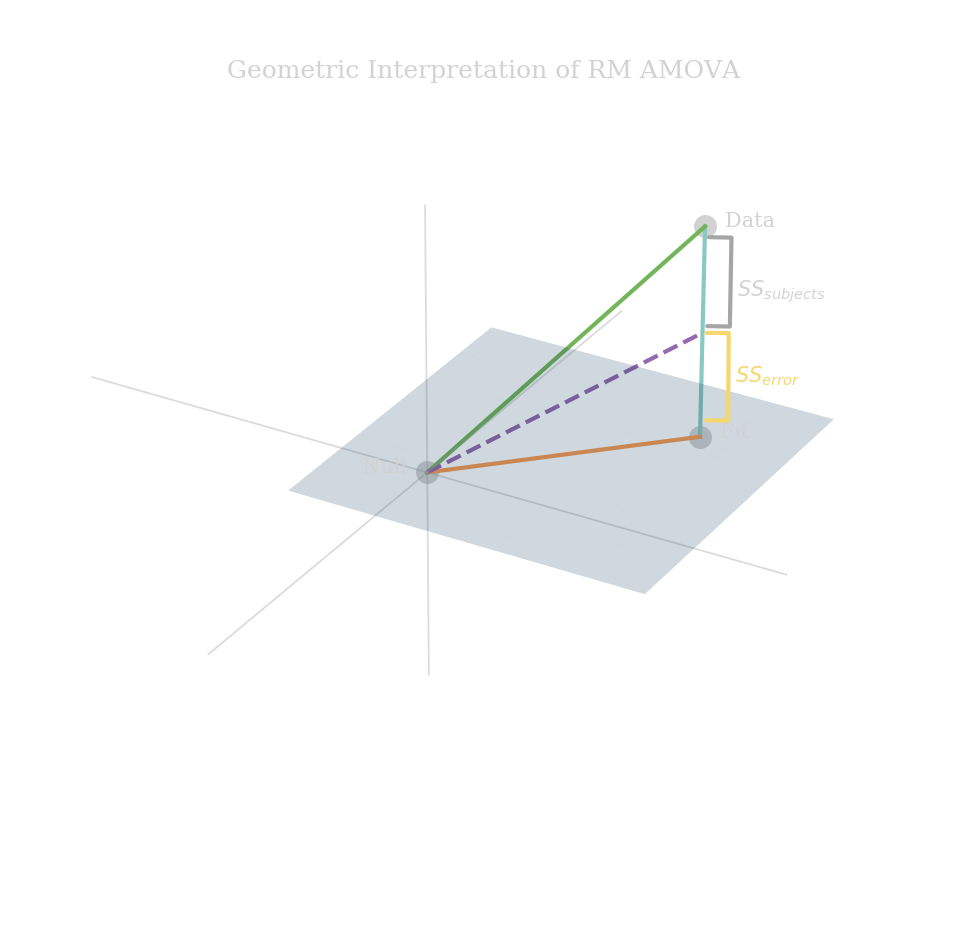

In [183]:
from mpl_toolkits.mplot3d import Axes3D

z = np.zeros((21,21));

xx,yy = np.meshgrid(np.arange(21)/10 - 0.5, np.arange(21)/10 - 0.5);

fig = pyp.figure(figsize=(8,8),dpi=150);
ax = fig.add_subplot(111, projection='3d');

#Add axes lines
axLines = [
  [0,0,-2,2,0,0],
  [-2,2,0,0,0,0],
  [0,0,0,0,-1,1.25]
];
ptData = [
  np.float64([2,2,2])/2, #d
  np.float64([0,0,0])/2, #n
  np.float64([2,2,0])/2 #f
];
ax.plot_surface(xx,yy,z,facecolor=col['satBlue'], alpha=0.2);

# datfit line
ax.plot([ptData[0][0],ptData[2][0]], [ptData[0][1],ptData[2][1]], [ptData[0][2],ptData[2][2]],color=col['blue'], lw=2);
# datnull line
ax.plot([ptData[0][0],ptData[1][0]], [ptData[0][1],ptData[1][1]], [ptData[0][2],ptData[1][2]],color=col['green'], lw=2);
# finull line
ax.plot([ptData[2][0],ptData[1][0]], [ptData[2][1],ptData[1][1]], [ptData[2][2],ptData[1][2]],color=col['orange'], lw=2);
# nullpartial
ax.plot(
  [ptData[1][0],ptData[2][0]], 
  [ptData[1][1],ptData[2][1]], 
  [ptData[1][2],np.mean([ptData[1][2],ptData[0][2]])],
  color=col['purple'], 
  lw=2,
  ls='--'
);
names = ['   Data', 'Null   ', '   Fit'];
align = ['left','right','left'];
for i in range(3):
  ax.plot(axLines[i][0:2], axLines[i][2:4], zs=axLines[i][4:6], lw=0.85, color = col['grey2'], alpha = 0.4);
  ax.scatter(ptData[i][0], ptData[i][1], ptData[i][2], color=col['grey'], s = 100,zorder=100);
  ax.text(ptData[i][0], ptData[i][1], ptData[i][2], names[i], ha=align[i]);


annotate3D(
  ax,
  s='',
  xy = (0.04095,0.00775),
  xyz = (1,1,1/2),
  arrowprops = dict(
    arrowstyle='-',
    connectionstyle=f'bar,fraction=0.3',
    facecolor = col['yellow'],
    edgecolor = col['yellow'],
    linewidth=2
  )
);

annotate3D(
  ax,
  s='',
  xy = (0.0412,0.027),
  xyz = (1,1,0.95),
  arrowprops = dict(
    arrowstyle='-',
    connectionstyle=f'bar,fraction=0.3',
    facecolor = col['grey2'],
    edgecolor = col['grey2'],
    linewidth=2
  )
);

ax.text(ptData[2][0], ptData[2][1], 0.7, r'     $SS_{subjects}$', ha='left', va='center');
ax.text(ptData[2][0], ptData[2][1], 0.3, r'     $SS_{error}$', color=col['yellow'],ha='left', va='center');

ax.set_xlim((-1,1.5));
ax.set_ylim((-1,1.5));
ax.set_zlim((-1,1.05));
ax.set_axis_off();
ax.patch.set_alpha(0);
ax.set_title('Geometric Interpretation of RM AMOVA');

fig.savefig('../img/AOV_SSRM.svg', transparent=True);

## Post-hoc testing

in a test at $\alpha = 0.05$, there is a 5% chance of getting a false positive if the null hypothesis is true. In 100 tests, each at $\alpha = 0.05$, we "expect 5 false positives" if all 100 null hypotehses are true, but really, the probability of getting $k$ false-positives is determinable through the binomial distribution, $p(k\, |\, \alpha)$.

We can also determine the probability of getting k false positives by bootstrap. Create a deck with 100 cards, 5 of which are red, then resample with replacement and count the red cards.

In [689]:
deck = np.repeat(['red','black'], (5,95));
B=10000
boot = np.zeros(B);
for b in range(B):
  bootdeck = np.random.choice(deck,len(deck),replace=True);
  boot[b] = np.sum(bootdeck == 'red');
pval = np.mean(boot > 0);
print(pval)

0.994


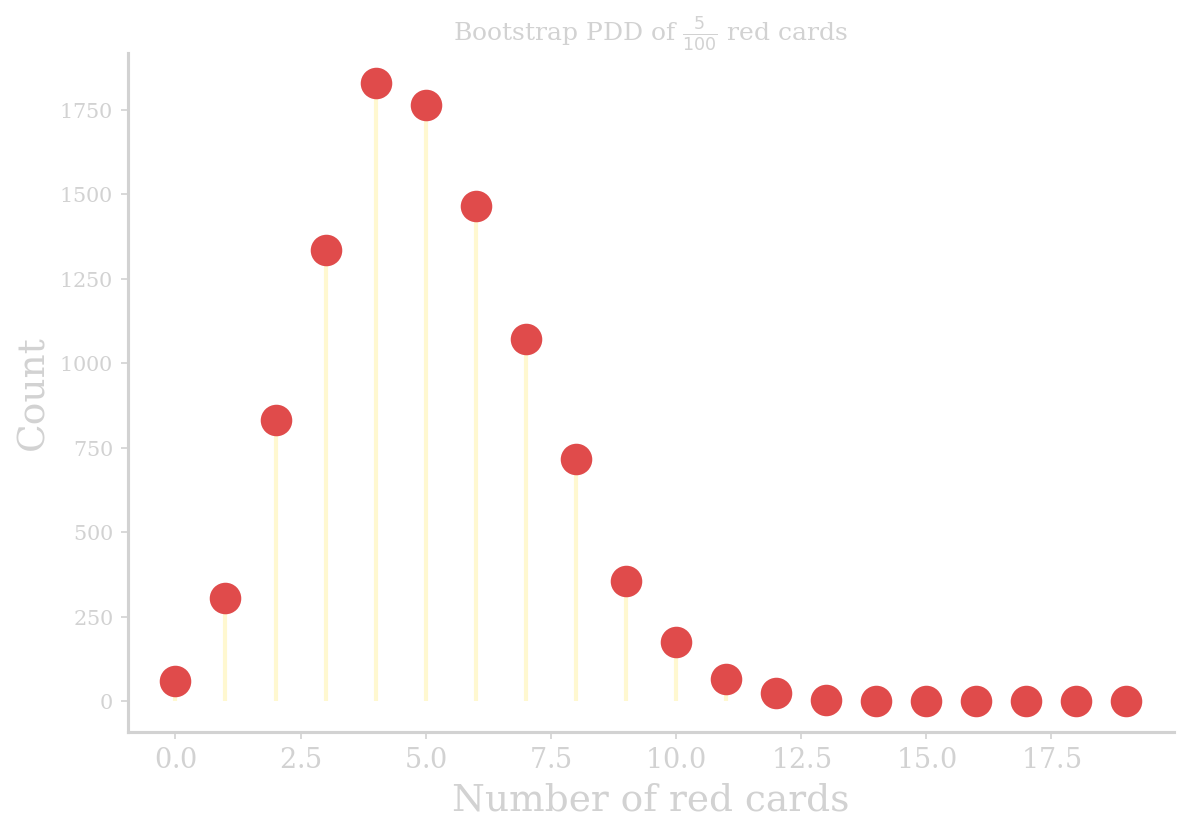

In [704]:
# stemplot
bins = np.linspace(-0.5,100.5, 101);
hist = np.histogram(boot,bins = bins)

fig = pyp.figure();
ax = fig.subplots();

lns = [];
for i in range(20):
  lns.append(
    [
      (i,0),
      (i,hist[0][i])
    ]
  );
lcol = mpl.collections.LineCollection(lns,colors = col['offwhite'],linewidths=2);
ax.add_collection(lcol);

ax.scatter(range(20), hist[0][:20], color=col['red'],s=200,zorder=100);

ax.set_xlabel('Number of red cards');
ax.set_ylabel('Count');
ax.set_title(r'Bootstrap PDD of $\frac{5}{100}$ red cards')

ax.patch.set_alpha(0);

In [710]:
alpha = 0.05
ns = range(1,101);
probs = np.zeros(len(ns));
B=10000;
for n in range(len(ns)):
  tmp = np.zeros(B);
  for b in range(B):
    tmp[b] = np.sum(
      np.random.choice(['false','true'], ns[n], replace=True,p=[alpha,1-alpha]) == 'false'
    );
  probs[n] = np.mean(tmp > 0);

5
15
25
35
45


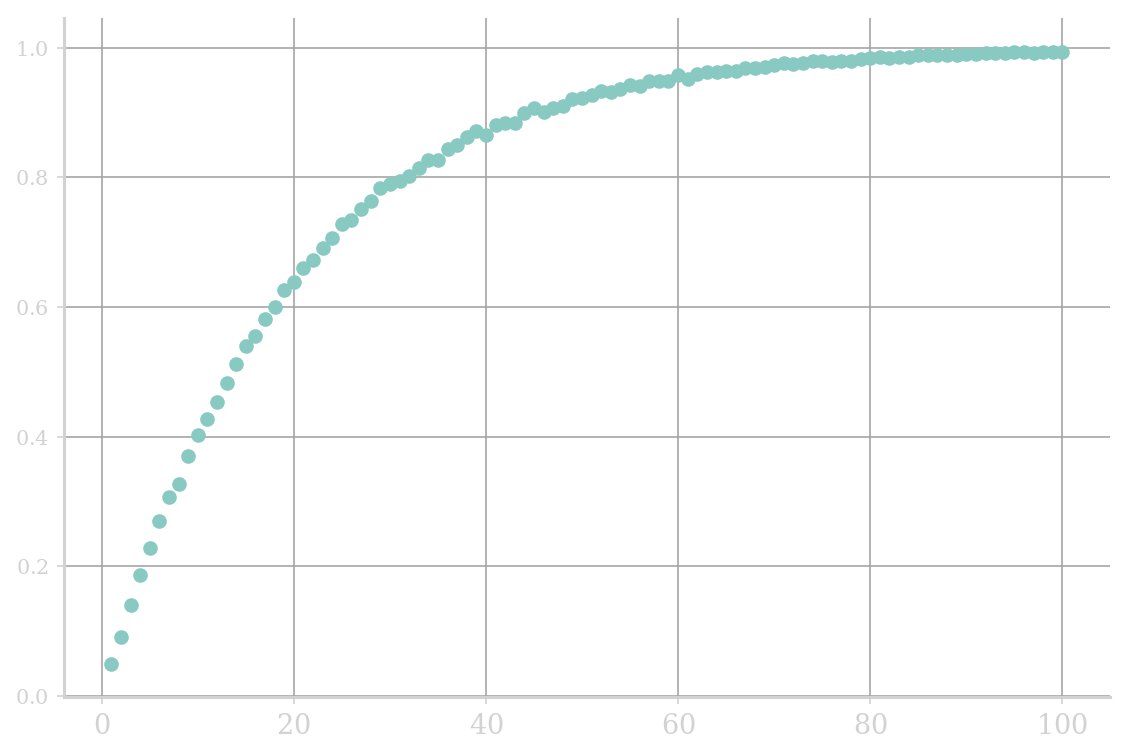

In [720]:
pyp.scatter(ns,probs,color=col['blue'],zorder=100);
pyp.grid('on',zorder=-1);
for i in range(5,55,10):
  print(i)

## Coding ANOVA

Now that we have our theory in place, let's create some code to compute our F-statistic from a data frame and then we will test it.

In [187]:
# convenience function
def sweepMean(ar,ofst=0):
    ar = np.array(ar);
    return ar - np.mean(ar)+ofst

# function to get interaction group vector
def interactions(*groups,sep='.'):
  nGroups = len(groups);
  if nGroups == 1:
    return np.ravel(groups[0]);
  interacts = np.ravel(groups[0]);
  cleanString = lambda x: "".join(x.split());
  for g in range(1,nGroups):
    interacts = interacts+sep;
    currentGroup = np.ravel([cleanString(s) for s in groups[g]]);
    interacts = interacts + currentGroup;
  return interacts

In [276]:
# function to apply statistic over groups without aggregation
def ave(x, *groups, FUN=np.mean, **funArgs):
  x = np.ravel(x);
  y = x.copy()
  nGroups = len(groups);
  if not nGroups:
    x.fill(FUN(x));
    return x
  #Determine interactions
  groupVector = interactions(*groups,sep=".");
  levels = np.unique(groupVector);
  for lev in levels:
    y[groupVector==lev] = FUN(x[groupVector==lev], **funArgs);
  return y

In [235]:
g1 = np.array(['A','A','A','A','A','A','B','B','B','B','B','B'],dtype=np.object)
g2 = np.array(['X','X','X','Y','Y','Y','X','X','X','Y','Y','Y'],dtype=np.object)
interactions(g1,g2)

array(['A.X', 'A.X', 'A.X', 'A.Y', 'A.Y', 'A.Y', 'B.X', 'B.X', 'B.X',
       'B.Y', 'B.Y', 'B.Y'], dtype=object)

In [250]:
dat = np.random.normal(20,10,12);
ave(dat,g1).round(2)

array([13.66, 13.66, 13.66, 13.66, 13.66, 13.66, 17.57, 17.57, 17.57,
       17.57, 17.57, 17.57])

In [252]:
ave(dat,g1,g2).round(2)

array([18.11, 18.11, 18.11,  9.2 ,  9.2 ,  9.2 , 20.33, 20.33, 20.33,
       14.82, 14.82, 14.82])

In [253]:
(dat - ave(dat,g1,g2)).round(2)

array([  1.4 ,  -2.62,   1.22, -13.81,   1.17,  12.64, -12.85,   2.73,
        10.13,  13.11,  -8.77,  -4.34])

In [214]:
# anova F_stat function
def fStat_oneway(y,*groups,dof=False, center=np.mean, agg = lambda v: np.sum((v)**2)):
  if not len(groups):
    raise ValueError('Input requires at leas 1 grouping vector!');
  groupVector = groups[0];
  gs = np.unique(groupVector);
  if len(gs) < 2:
    raise ValueError('Grouping vector must contain at least 2 groups for ANOVA!')
  # currently, oneway only accepts a single grouping vector
  if dof:
    dofB = len(gs)-1;
    dofW = len(y) - len(gs);
  else:
    dofB = 1;
    dofW = 1;
  grandMu = center(y);
  groupMus = ave(y,groupVector,FUN=center);
  SSB = agg(groupMus-grandMu) / dofB;
  SSW = agg(y-groupMus) / dofW;
  return SSB/SSW;

# bootstrap function
def boot_oneway(y,*groups,dof=False,B=10000, center='mean', agg = 'SSQ'):
  center = utils.validateString(center, ['mean', 'median']);
  agg = utils.validateString(agg, ['SSQ', 'SAB']);
  if center == 'median':
    center = np.median;
  elif center =='mean':
    center = np.mean;
  else:
    center = np.mean;
  if agg == 'SAB':
    agg = lambda val: np.sum(np.abs(val));
  else:
    agg = lambda val: np.sum( (val)**2 );
  y = np.ravel(y);
  F_observed = fStat_oneway(y,*groups,dof=dof,center=center,agg=agg);
  glen=len(np.unique(groups[0]));
  if dof:
    dofB = glen-1;
    dofW = len(y) - glen;
  else:
    dofB = 1;
    dofW = 1;
  F_boots = np.zeros(B);
  F_null = np.zeros(B);
  for b in range(B):
    nullData = np.random.choice(y, len(y), replace=True);
    bootData = ave(y,*groups,FUN=lambda a: np.random.choice(a,len(a), replace=True));
    F_boots[b] = fStat_oneway(bootData,*groups,dof=dof,center=center,agg=agg);
    F_null[b] = fStat_oneway(nullData,*groups,dof=dof,center=center,agg=agg);
  crit = np.percentile(F_null, q=95);
  ci = np.array([np.percentile(F_boots, q = 2.5),np.percentile(F_boots, q = 97.5)]);
  pval = np.mean(F_null >= F_observed);
  return {
    'Bootstraps': pd.DataFrame({'Null':F_null,'CI':F_boots}),
    'Observed': F_observed,
    'CI': ci,
    'CritLevel': crit,
    'pvalue': pval,
    'dof': [dofB,dofW]
  };
  

# UCLA Big Box

In [215]:
df = pd.read_csv('data/UCLASalaries.csv');
MU = df['Gross'].mean()
MED = df['Gross'].median()
SIGMA = df['Gross'].std()
SE = SIGMA/np.sqrt(df.shape[0])
print(f'MU=${MU:,.2f}',f'SIGMA=${SIGMA:,.2f}',f'SE=${SE:,.2f}',f'N={df.shape[0]:d}')

MU=$81,073.71 SIGMA=$84,421.41 SE=$457.54 N=34045


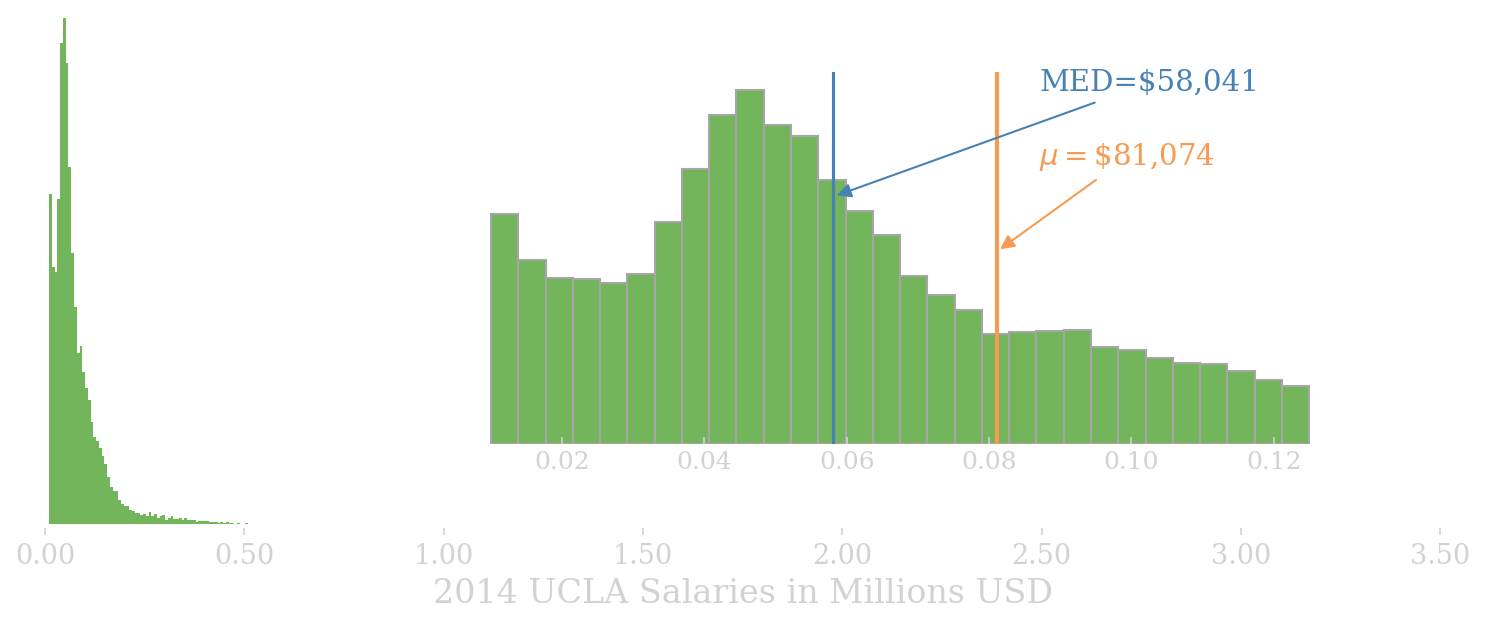

In [257]:
fig = pyp.figure(figsize=(12,4.5), dpi=150)
ax1 = fig.subplots()
ax2 = fig.add_axes([0.35,0.25,0.5,0.55])

##LABELS
ax1.set_label('ALL')
ax2.set_label('LOW')


## axes 1
ax1.hist(df['Gross'],bins=500,density=True, color = col['green']);

ax1.set_xlim([0,3500000])
ax1.set_ylim([-0.0000001,0.000014])
ax1.set_xlabel('2014 UCLA Salaries in Millions USD',size=16);
# ax1.axvline(MU, color = col['orange'], lw=2)
# ax1.axvline(MED, color = col['satBlue'])
# ax1.annotate(
#     r'$\mu=$'+f'\${MU:,.0f}',
#     xy= (MU,0.000014*0.8),
#     xytext= (MED*2,0.000014*0.85),
#     xycoords= 'data',
#     textcoords='data',
#     size= 14,
#     color= col['orange'],
#     arrowprops= {
#         'arrowstyle': '-|>',
#         'edgecolor': col['orange'],
#         'facecolor': col['orange']
#     }
# );
# ax1.annotate(
#     f'MED=\${MED:,.0f}',
#     xy= (MED,0.000014*0.9),
#     xytext= (MED*2,0.000014*0.95),
#     xycoords= 'data',
#     textcoords='data',
#     size= 14,
#     color= col['satBlue'],
#     arrowprops= {
#         'arrowstyle': '-|>',
#         'edgecolor': col['satBlue'],
#         'facecolor': col['satBlue'],
        
#     }
# );



## axes 2 <125000
ax2.hist(df['Gross'][df['Gross']<125000],bins=30,density=True, color = col['green'],edgecolor=col['grey2']);
# ax2.scatter(
#     df['Gross'][df['Gross']<125000],
#     np.zeros(df['Gross'][df['Gross']<125000].shape), 
#     marker='|', 
#     color=col['purple'], 
#     zorder=100, 
#     alpha=0.25,
#     s=10
# );
ax2.axvline(MU, color = col['orange'], lw=2)
ax2.axvline(MED, color = col['satBlue'])
ax2.annotate(
    r'$\mu=$'+f'\${MU:,.0f}',
    xy= (MU,0.000014*0.7),
    xytext= (MED*1.5,ax2.get_ylim()[1]*0.75),
    xycoords= 'data',
    textcoords='data',
    size= 14,
    color= col['orange'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['orange'],
        'facecolor': col['orange']
    }
);
ax2.annotate(
    f'MED=\${MED:,.0f}',
    xy= (MED,0.000014*0.9),
    xytext= (MED*1.5,ax2.get_ylim()[1]*0.95),
    xycoords= 'data',
    textcoords='data',
    size= 14,
    color= col['satBlue'],
    arrowprops= {
        'arrowstyle': '-|>',
        'edgecolor': col['satBlue'],
        'facecolor': col['satBlue'],
        
    }
);



## format axes:
for ax in [ax1,ax2]:
  ax.patch.set_alpha(0);
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.set_yticks([]);
  xt = ax.get_xticks();
  ax.set_xticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
  if ax is not ax1:
    ax.tick_params(axis='x', labelsize = 12, direction= 'in');

fig.savefig('../img/AOV_UCLA_overview.svg', transparent=True);

In [279]:
# Collect 3 different samples
N = 15
samples = [];
for _ in range(3):
  samples.append(df.sample(n=N,replace=True)['Gross']);

groups = np.ravel(np.array(np.repeat(np.arange(3), N),dtype=np.object));
vals = np.concatenate(samples);

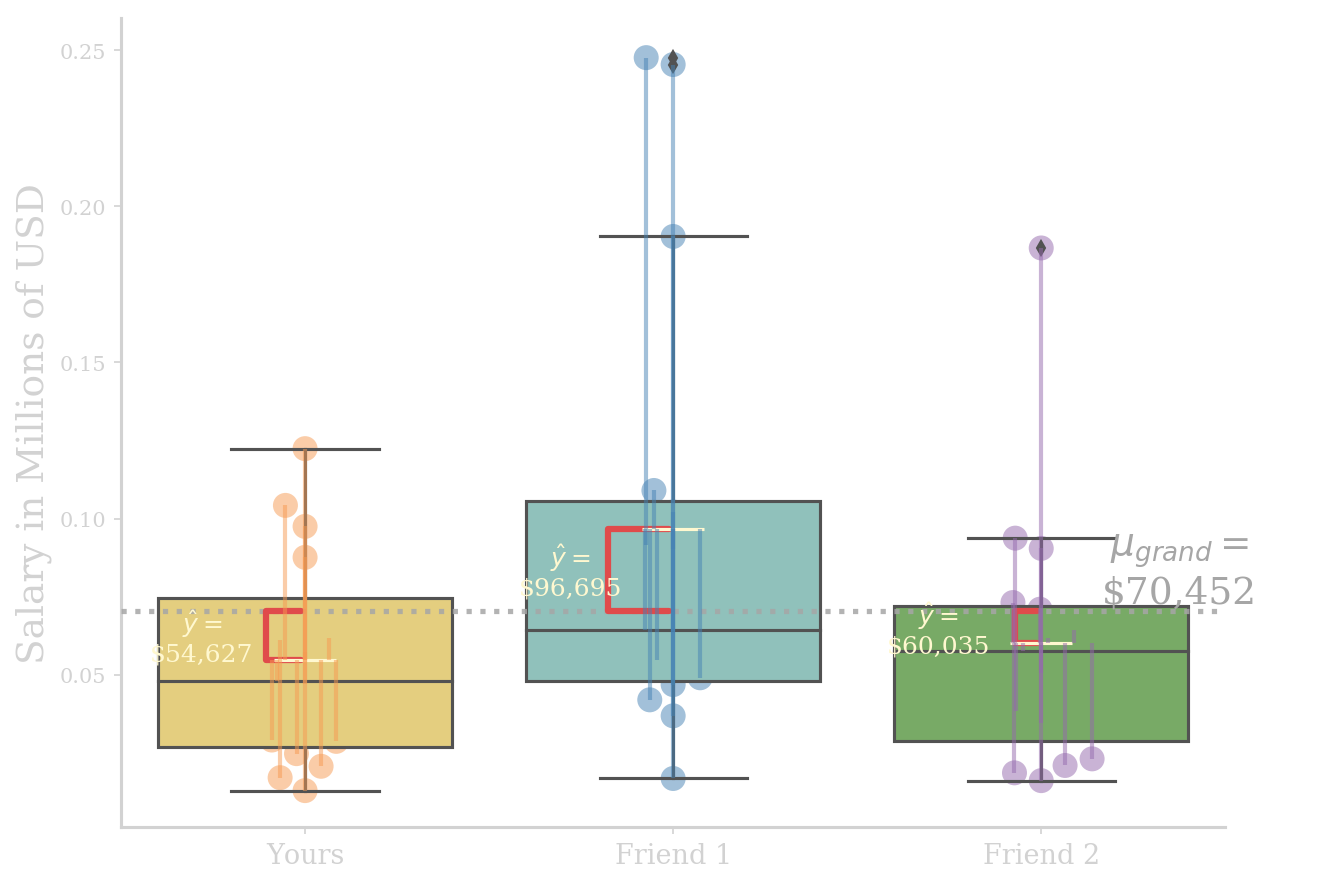

In [280]:
import seaborn as sns

# boxplot samples
fig = pyp.figure(figsize=(9,6), dpi=150);
axs = fig.subplots();
axs = utils.multiX(axs,n=5,concatOriginal=True);

boxcols = ['yellow', 'blue', 'green'];
dotcols = ['orange', 'satBlue', 'purple'];
snscol = sns.color_palette([col[cc] for cc in dotcols]);
snsbcl = sns.color_palette([col[cc] for cc in boxcols]);

#Put the beeswarm on bottom
with snscol:
  sns.swarmplot(groups,vals, ax = axs[0], size = 12, edgecolor='gray',alpha=0.5);

# put the Boxes on middle (hide in presentation)
with snsbcl:
  sns.boxplot(groups,vals, ax = axs[1]);

# plot the lines (2) with annotaions (3) 
grandMean = np.mean(vals);
resids = vals - ave(vals,groups);
groupResids = ave(vals,groups) - grandMean;
groupMeans = [np.mean(a) for a in samples];

axs[2].axhline(grandMean, color = col['grey2'], linestyle=':', linewidth=2.5, alpha = 0.85);
axs[2].text(
  axs[2].get_xlim()[1]*0.95,
  grandMean,
  r'$\mu_{grand}=$'+f'\n${grandMean:,.0f}',
  size = 18,
  ha = 'center',
  va = 'bottom',
  color = col['grey2']
);
# ax4 for mu scatter. keep
axs[4].scatter(
  [0,1,2],
  groupMeans,
  marker = '_',
  color = col['offwhite'],
  s = 900
);


# ax 3 for viewing SSB
for mi in range(3):
  mu = groupMeans[mi];
  muDist = grandMean-mu;
  styleDir = 0.8*np.sign(muDist);
  axs[3].annotate(
    '',
    xy = (mi,mu),
    xytext = (mi,grandMean),
    arrowprops = dict(
      arrowstyle='-',
      connectionstyle=f'bar,fraction={styleDir:.1f}',
      facecolor = col['red'],
      edgecolor = col['red'],
      linewidth=3
    )
  );
  axs[3].text(
    mi-0.28,
    grandMean - muDist/2,
    r'$\hat{y}=$'+f'\n${mu:,.0f}',
    ha = 'center',
    va = 'center',
    size = 12,
    color = col['offwhite']
  );

# ax 5 for ssW keep ax4 vis
xs = [];
ys = [];
cc = [];

for ln in axs[0].get_children():
  if isinstance(ln, mpl.collections.PathCollection):
    ln.set_offset_position('data');
    ofst = ln.get_offsets();
    ln.set_offset_position('screen');
    xs.append(ofst[:,0]);
    ys.append(ofst[:,1]);
    cc.append(ln.get_facecolors());

xs = np.ravel(np.concatenate(xs));
ys = np.ravel(np.concatenate(ys));
cc = np.concatenate(cc);
# print('xs',xs,'\nys',ys,'\ngm',ave(vals,groups))

pairs = np.vstack([xs,ys,xs,ave(vals,groups)]).reshape((2,2,len(xs)));
lines = [];
for sh in range(pairs.shape[-1]):
  lines.append(pairs[:,:,sh])
lc = mpl.collections.LineCollection(lines,color=cc,linewidths=2);
axs[5].add_collection(lc);


# finalize graph
axs[0].set_xticklabels(['Yours', 'Friend 1', 'Friend 2']);
for ax in axs:
  ax.patch.set_alpha(0);
  ax.set_ylim((axs[0].get_ylim()));
  if ax is axs[0]:
    xt = ax.get_yticks();
    ax.set_yticklabels([f'{tx/10**6:1.2f}' for tx in xt]);
    ax.set_ylabel('Salary in Millions of USD');
  if ax is not axs[0]:
    ax.axis('off');    

fig.tight_layout();
fig.savefig('../img/AOV_UCLA_box.svg', transparent=True);

In [281]:
uclaAOV = boot_oneway(vals, groups, dof=True, center = 'mean', agg = 'SSQ');

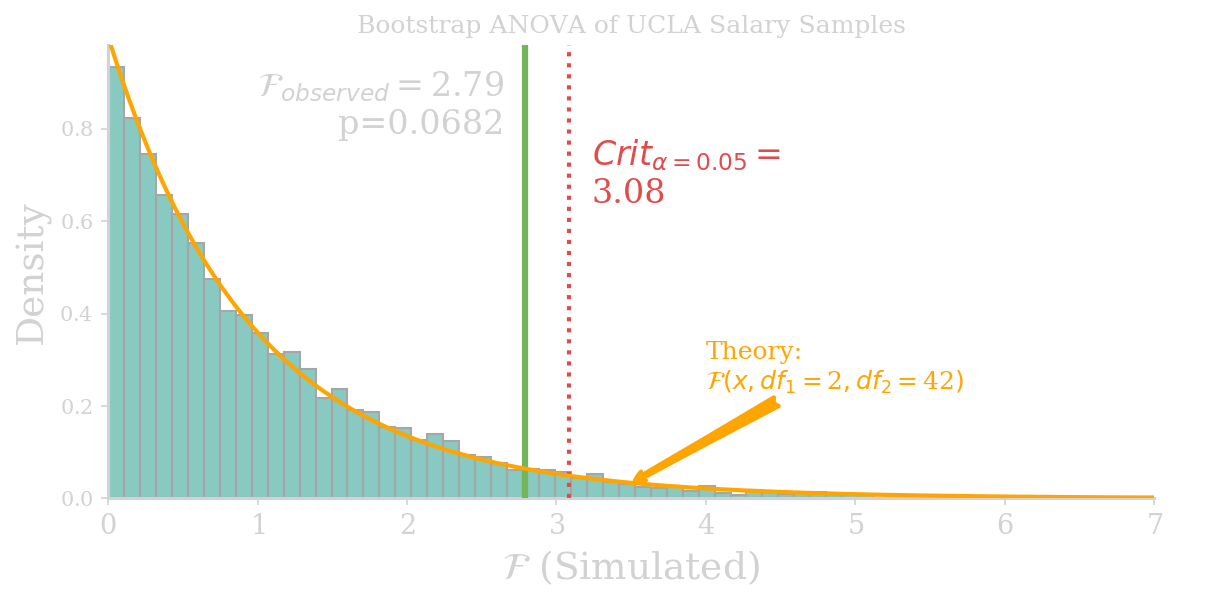

In [283]:
# plot bootstrap
fig,ax = pyp.subplots(figsize=(9,4), dpi=150);

ax = utils.multiX(ax,n=2,concatOriginal=True)
ax[0].hist(uclaAOV['Bootstraps']['Null'], bins = 'fd', color=col['blue'],density=True,edgecolor=col['grey2']);
ax[1].axvline(uclaAOV['Observed'], color=col['green'], lw=3);
ax[1].axvline(uclaAOV['CritLevel'], color = col['red'], lw=2, ls=':');
ax[1].text(
  uclaAOV['CritLevel']*1.05,
  ax[0].get_ylim()[1]*0.8, 
  r'$Crit_{\alpha = 0.05}=$'+f"\n{uclaAOV['CritLevel']:.2f}",
  color=col['red'], 
  size=16,
  ha='left',
  va='top'
);
ax[1].text(
  uclaAOV['Observed']*0.95, 
  ax[0].get_ylim()[1]*0.95, 
  r'$\mathcal{F}_{observed}=$'+f"{uclaAOV['Observed']:0.2f}\np={uclaAOV['pvalue']:0.4f}",
  size=16,
  ha='right',
  va='top'
);

from scipy import stats
dof1 = uclaAOV['dof'][0]
dof2 = uclaAOV['dof'][1]
x = np.linspace(0.0001,ax[0].get_xlim()[1], 500);
ax[2].plot(x, stats.f.pdf(x,dof1,dof2), lw=2, color = 'orange');
ax[2].annotate(
    'Theory:\n'+r'$\mathcal{F}(x,df_1=$'+f'{dof1:.0f}'+r'$, df_2=$'+f'{dof2:.0f}'+r'$)$',
    xy= (3.5,stats.f.pdf(3.5,dof1,dof2)),
    xytext = (4,stats.f.pdf(1.25,dof1,dof2)),
    size = 12,
    color = 'orange',
    ha = 'left',
    va = 'center',
    arrowprops = dict(
        arrowstyle = 'fancy',
        color = 'orange',
        linewidth = 2
    )
);
ax[0].set_xlabel(r'$\mathcal{F}$ (Simulated)');
ax[0].set_ylabel('Density');

for a in ax:
  a.patch.set_alpha(0);
  a.set_xlim((0,7));
  a.set_ylim(ax[0].get_ylim());
  if a is not ax[0]:
    a.axis('off');
  
ax[0].set_title('Bootstrap ANOVA of UCLA Salary Samples');
fig.savefig('../img/AOV_ucla_null.svg')

## Plant Growth

Now that we have our functions, let's use them on some data

In [5]:
plants = pd.read_csv('./data/PlantGrowth.csv');
plants.set_index('Unnamed: 0', inplace=True);
plants.index.rename('ID',inplace=True)
plants

,weight,group
ID,,
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl


In [661]:
groups = plants.groupby('group');

groupDots = [];
for grp in groups:
  groupDots.append(st.makeDots(grp[1]['weight'],type='disc', bins=int(len(grp[1]['weight'])/2)));
#np.unique(plants.group.values)
groups.median().iloc[2,0]

5.4350000000000005

In [676]:
plantAOV = boot_oneway(plants.weight.values, plants.group.values,dof=True, center='mean');

## View the data

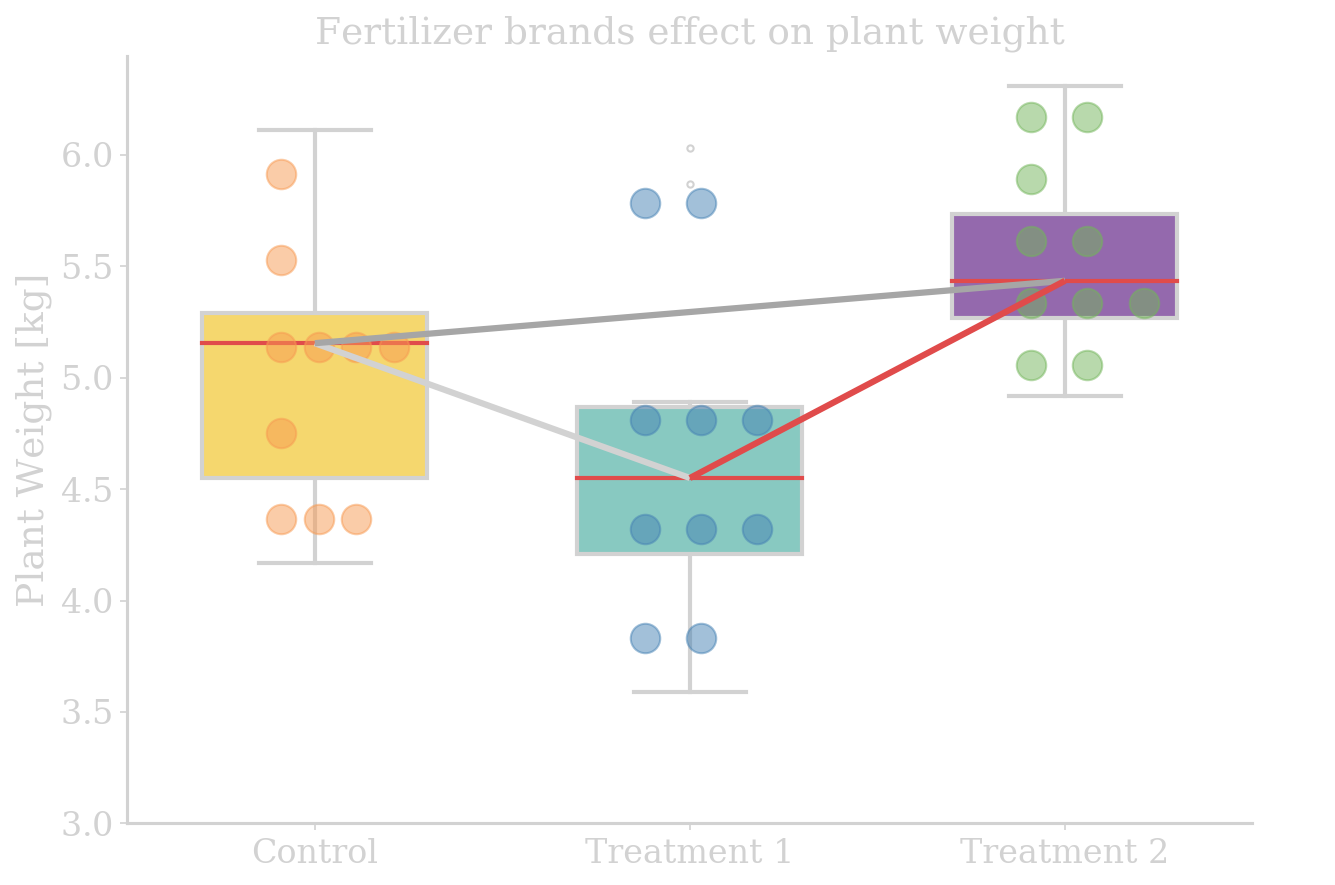

In [668]:

fig = pyp.figure(figsize=(9,6), dpi=150);
axs = fig.subplots();

boxcols = ['yellow', 'blue', 'purple'];
dotcols = ['orange', 'satBlue', 'green'];

axs = utils.multiX(ax=axs,n=4,concatOriginal=True,concatFirst=True);
bxs = plants.boxplot(
    'weight', 
    by='group', 
    ax = axs[0],
    grid=False,
    return_type='dict',
    patch_artist=True,
    widths=0.6
);
for bb in bxs['weight']:
    for b in range(len(bxs['weight'][bb])):
        if bb == 'medians':
            bxs['weight'][bb][b].set(color=col['red'], linewidth=2);
            continue
        if bb == 'boxes':
            bxs['weight'][bb][b].set(edgecolor=col['grey'], linewidth=2, facecolor = col[boxcols[b]]);
            continue
        if bb == 'fliers':
            bxs['weight'][bb][b].set(markeredgecolor=col['grey'], linewidth=2, marker='.');
        bxs['weight'][bb][b].set(color=col['grey'], linewidth=2);

axs[0].set_title('Fertilizer brands effect on plant weight',size=18);
axs[0].set_xlabel('')
axs[0].set_xticklabels(['Control', 'Treatment 1', 'Treatment 2']);

# Remove text overlay
for cc in fig.get_children():
    if isinstance(cc, mpl.text.Text):
        cc.remove();

#Overlay the points
for d in range(len(groupDots)):
    axs[1].scatter(
        sweepMean(st.linRescale(val=groupDots[d]['y'],newRange = (0.5,0.8)),d+1),
        groupDots[d]['x'],
        color=col[dotcols[d]],
        marker='.',
        s=800,
        alpha = 0.5,
        
    );
axs[0].set_ylabel('Plant Weight [kg]');

#plot interaction lines
intSegs = [
  mpl.collections.LineCollection(
    [
      [(1,groups.median().iloc[0,0]),(2,groups.median().iloc[1,0])]
    ],
    colors = col['grey'],
    linewidths = 3
  ),
  mpl.collections.LineCollection(
    [
      [(1,groups.median().iloc[0,0]),(3,groups.median().iloc[2,0])]
    ],
    colors = col['grey2'],
    linewidths = 3
  ),
  mpl.collections.LineCollection(
    [
      [(2,groups.median().iloc[1,0]),(3,groups.median().iloc[2,0])]
    ],
    colors = col['red'],
    linewidths = 3
  )
];


for i in range(3):
  axs[i+2].add_collection(intSegs[i]);


for ax in axs:
    ax.set_ylim((3,axs[0].get_ylim()[1]));
    ax.patch.set_alpha(0);
    ax.tick_params(axis='both', labelsize = 16);
    if ax is not axs[0]:
        ax.axis('off');
fig.tight_layout();
fig.savefig('../img/AOV_plant_boxplot.svg', transparent=True);

## View the bootstraps

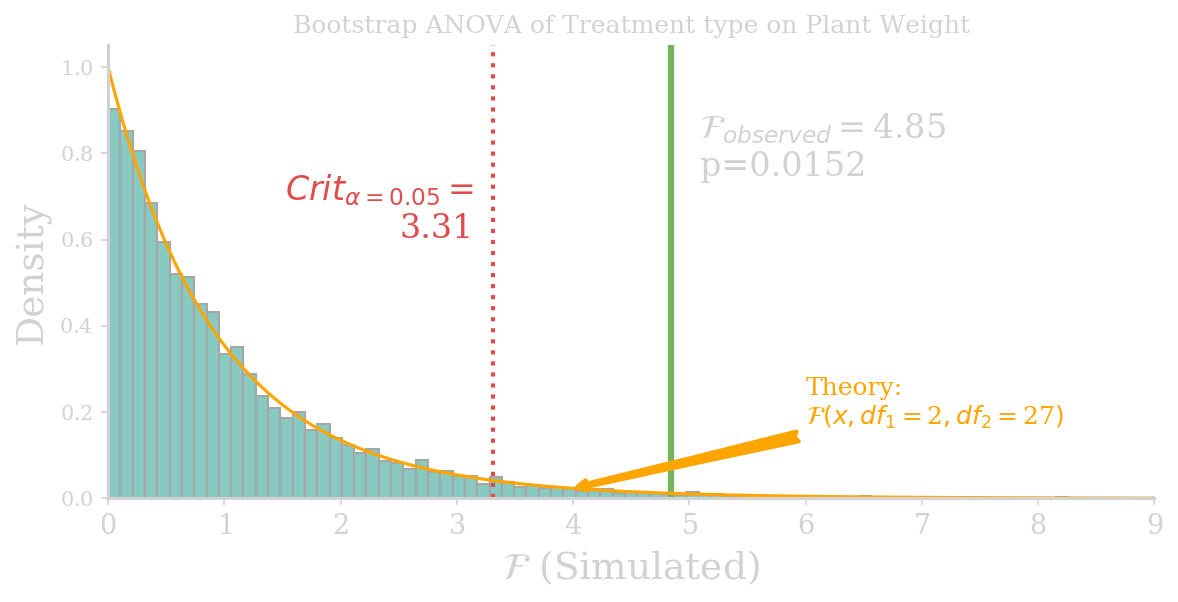

In [677]:
# fig = pyp.figure();
# ax = fig.subplots();
# ax.hist(plantAOV['Bootstraps']['CI']);
# ax.axvline(plantAOV['CI'][0],color=col['red']);
# ax.axvline(plantAOV['CI'][1],color=col['red']);
# ax.axvline(plantAOV['Observed'],color=col['orange']);

# plot bootstrap
fig,ax = pyp.subplots(figsize=(9,4), dpi=150);

ax.hist(plantAOV['Bootstraps']['Null'], bins = 'fd', color=col['blue'],density=True,edgecolor=col['grey2']);
ax.axvline(plantAOV['Observed'], color=col['green'], lw=3);
ax.axvline(plantAOV['CritLevel'], color = col['red'], lw=2, ls=':');
ax.text(
  plantAOV['CritLevel']*0.95,
  ax.get_ylim()[1]*0.8, 
  r'$Crit_{\alpha = 0.05}=$'+f"\n{plantAOV['CritLevel']:.2f}",
  color=col['red'], 
  size=16,
  ha='right',
  va='top'
);
ax.text(
  plantAOV['Observed']*1.05, 
  ax.get_ylim()[1]*0.95, 
  r'$\mathcal{F}_{observed}=$'+f"{plantAOV['Observed']:0.2f}\np={plantAOV['pvalue']:0.4f}",
  size=16,
  ha='left',
  va='top'
);
ax.set_xlabel(r'$\mathcal{F}$ (Simulated)');
ax.set_ylabel('Density');
ax.patch.set_alpha(0);

from scipy import stats
dof1 = plantAOV['dof'][0]
dof2 = plantAOV['dof'][1]
x = np.linspace(0.0001,ax.get_xlim()[1], 500);
ax.plot(x, stats.f.pdf(x,dof1,dof2), color = 'orange');
ax.annotate(
    'Theory:\n'+r'$\mathcal{F}(x,df_1=$'+f'{dof1:.0f}'+r'$, df_2=$'+f'{dof2:.0f}'+r'$)$',
    xy= (4,stats.f.pdf(4,dof1,dof2)),
    xytext = (6,stats.f.pdf(1.5,dof1,dof2)),
    size = 12,
    color = 'orange',
    ha = 'left',
    va = 'center',
    arrowprops = dict(
        arrowstyle = 'fancy',
        color = 'orange',
        linewidth = 2
    )
);
ax.set_xlim((0,9));
ax.set_title('Bootstrap ANOVA of Treatment type on Plant Weight');
fig.savefig('../img/AOV_plant_null.svg')

## Follow Up

Our pvalue was significant, indicating that if the Null hypothesis were true, there would be a significantly small chance of observing our $\mathcal{F}$-statistic. We would interpret this as our means are not, or at least one of them isn't, likely to be equal. Given all our ANOVA assumptions.

So now, we need to find out, who is different and why.

In [678]:
def oneBoot(g,statistic=np.mean,B=10000):
  bootdata = np.random.choice(g,(len(g),B), replace=True);
  bootdata = np.apply_along_axis(statistic,0,bootdata);
  return {
    "Center": statistic(g),
    "Bootstraps": bootdata,
    "CI": [np.percentile(bootdata,q=qq) for qq in [2.5,97.5]]
  }
def boot_twogroups(g1,g2,statistic=np.mean,B=10000):
  B=10000;
  g1_stat = oneBoot(g1,statistic=statistic,B=B);
  g2_stat = oneBoot(g2,statistic=statistic,B=B);
  dObs = statistic(g1) - statistic(g2);
  everybody = np.concatenate([g1,g2]);
  boot_g1 = np.random.choice(everybody, (len(g1),B), replace=True);
  boot_g2 = np.random.choice(everybody, (len(g2),B), replace=True);
  bootDiffs = \
    np.apply_along_axis(statistic,0,boot_g1) - \
    np.apply_along_axis(statistic,0,boot_g2);
  bootEffects = g1_stat['Bootstraps'] - g2_stat['Bootstraps'];
  return {
    'Group1': g1_stat,
    'Group2': g2_stat,
    'Bootstraps': bootDiffs,
    'Observed': dObs,
    'Effects': {'Bootstraps': bootEffects, 'CI': [np.percentile(bootEffects, q=qq) for qq in [2.5,97.5]]},
    'Pvalue': np.mean((bootDiffs >= np.abs(dObs)) | (bootDiffs <= -np.abs(dObs)))
  };

In [679]:
plants

,weight,group
ID,,
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl


In [680]:
#plants
groups = plants.groupby('group')
groupInfo = groups.groups;
groupKeys = np.array(list(groupInfo.keys()));
contrastMatrix = groupKeys[np.array([[0,1],[0,2],[1,2]])];
contrastMatrix.shape[0]

tests = [];
boots = {};
for i in range(3):
  testName = contrastMatrix[i,0] + '.vs.' + contrastMatrix[i,1];
  print(testName)
  tests.append(testName);
  g1 = plants.iloc[groupInfo[contrastMatrix[i,0]]-1].weight.values;
  g2 = plants.iloc[groupInfo[contrastMatrix[i,1]]-1].weight.values;
  boots[testName] = boot_twogroups(g1,g2,B=10000,statistic=np.mean);


ctrl.vs.trt1
ctrl.vs.trt2
trt1.vs.trt2


In [681]:
tests
tHash = {}
for k in groupKeys:
  if k == 'ctrl':
    tHash[k] = 'Control';
  elif k == 'trt1':
    tHash[k] = 'Treatment 1';
  elif k == 'trt2':
    tHash[k] = 'Treatment 2';
  else:
    continue;
tHash

{'ctrl': 'Control', 'trt1': 'Treatment 1', 'trt2': 'Treatment 2'}

In [682]:
print(len(tests))
boots[tests[0]]['Effects'].keys()

3


dict_keys(['Bootstraps', 'CI'])

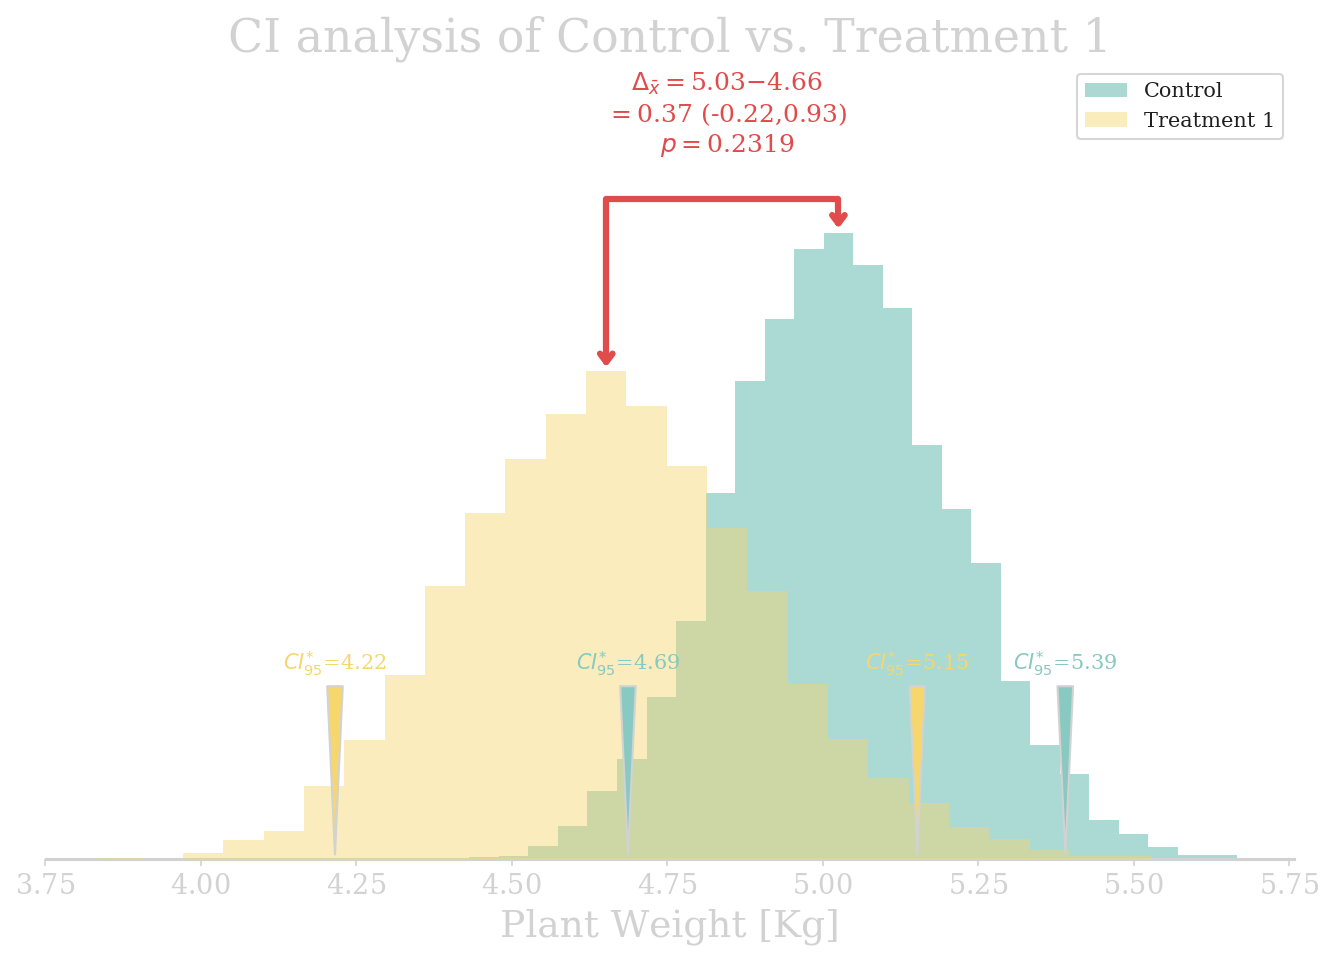

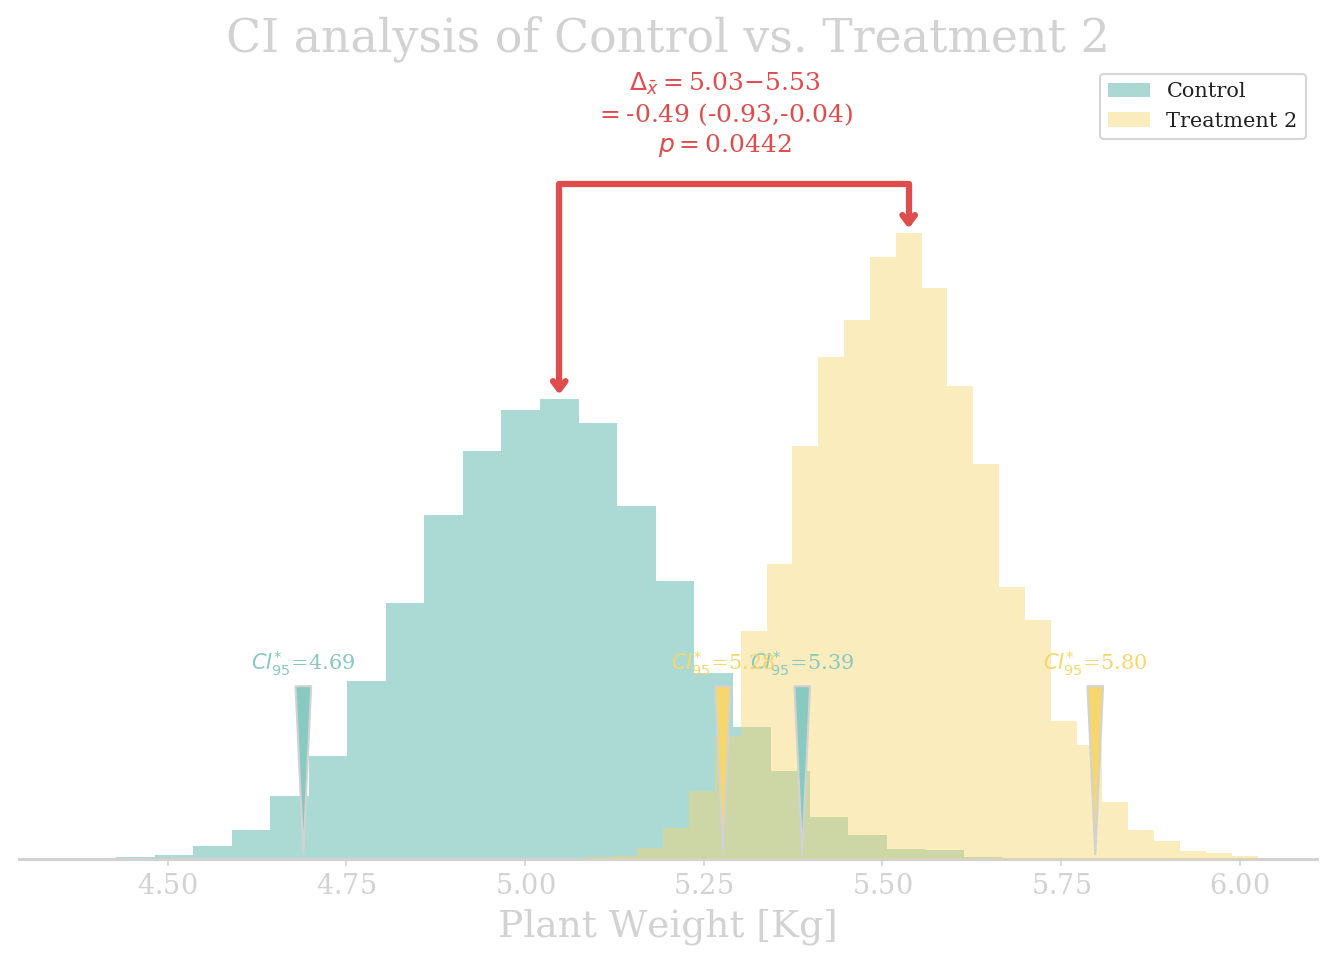

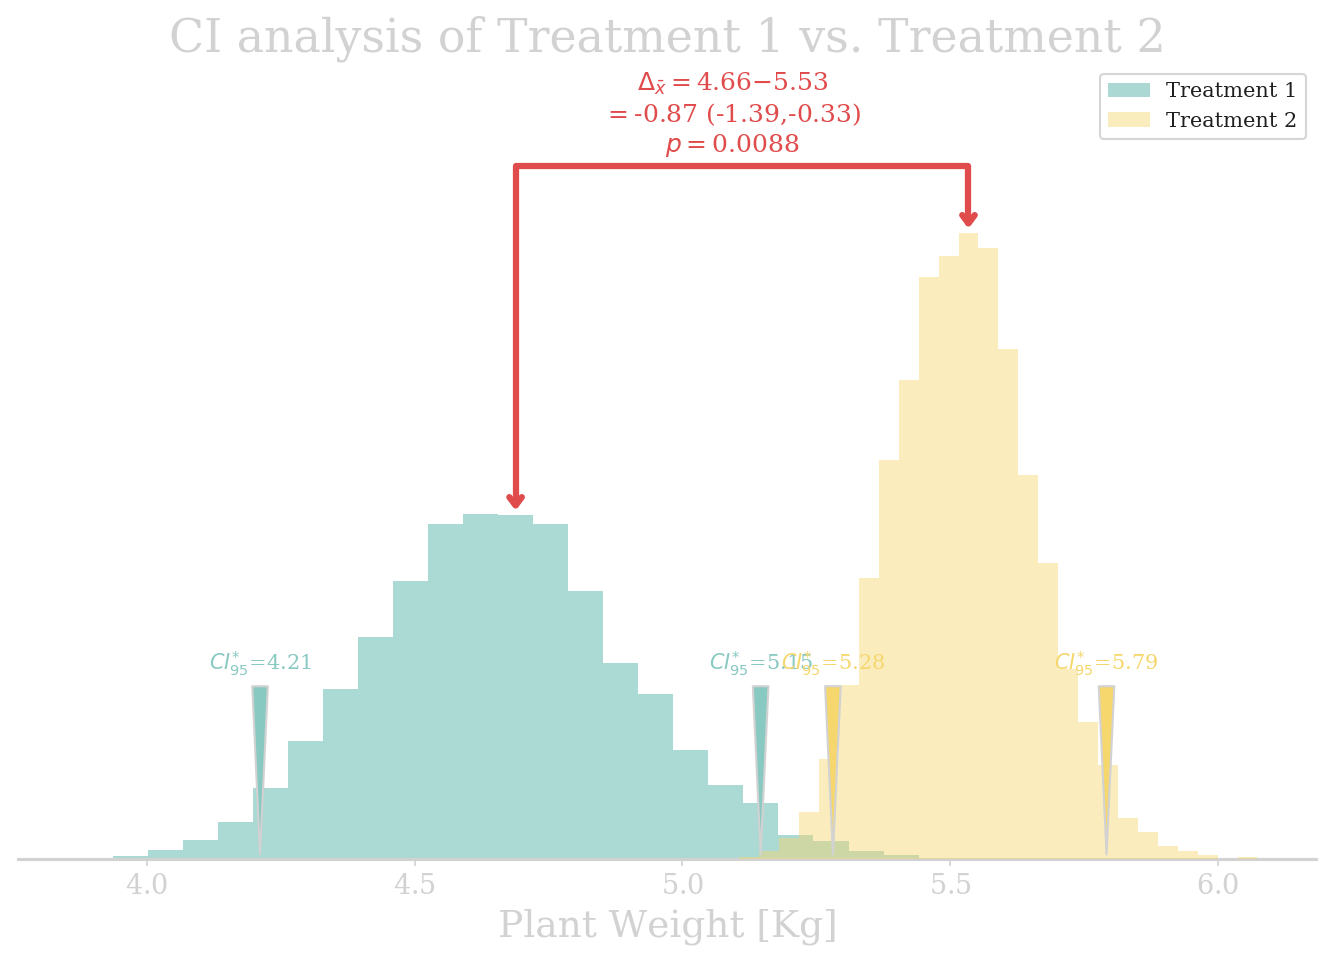

In [683]:

for i in range(len(tests)):
  tst = tests[i]

  g1 = tHash[tst.split('.')[0]];
  g2 = tHash[tst.split('.')[-1]];
  plotTitle = f'CI analysis of {g1} vs. {g2}'
  plotName = f'CI_Plants_{g1}_vs_{g2}'
  # print(plotName)

  testData = boots[tst];

  fig,axs = pyp.subplots(figsize=(9,6.5), dpi=150);

  axs = utils.multiX(axs,n=4,concatOriginal=True,concatFirst=True);
  # histograms
  h1= axs[0].hist(testData['Group1']['Bootstraps'], color=col['blue'], bins = 26, density=True, alpha=0.7, label = g1);
  h2= axs[1].hist(testData['Group2']['Bootstraps'], color=col['yellow'],bins = 26, density=True, alpha = 0.45, label = g2);
  for ax in axs:
    ax.set_ylim(
      np.min([axs[a].get_ylim()[0] for a in [0,1]]),
      np.max([axs[a].get_ylim()[1] for a in [0,1]])*1.1
    );
  # group 1
  ci1 = testData['Group1']['CI'];
  axs[2].annotate(
    r'$CI_{95}^{*}$' + f'={ci1[1]:,.2f}',
    xy = (ci1[1],0),
    xytext = (ci1[1],axs[0].get_ylim()[1]*0.25),
    color = col['blue'],
    size=10,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
      'arrowstyle': 'wedge,tail_width=0.75',
      'edgecolor': col['grey'],
      'facecolor': col['blue']
    },
    zorder=100
  );
  axs[2].annotate(
    r'$CI_{95}^{*}$' + f'={ci1[0]:,.2f}',
    xy = (ci1[0],0),
    xytext = (ci1[0],axs[0].get_ylim()[1]*0.25),
    color = col['blue'],
    size=10,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
      'arrowstyle': 'wedge,tail_width=0.75',
      'edgecolor': col['grey'],
      'facecolor': col['blue']
    },
    zorder=100
  );

  # axs[1].axvline(testData['Group1']['CI'][0],color=col['satBlue']);
  # axs[1].axvline(testData['Group1']['CI'][1],color=col['satBlue']);
  # axs[1].axvline(testData['Group1']['Center'],color=col['green'],lw=3);

  # group 2
  ci2 = testData['Group2']['CI'];
  axs[3].annotate(
    r'$CI_{95}^{*}$' + f'={ci2[1]:,.2f}',
    xy = (ci2[1],0),
    xytext = (ci2[1],axs[0].get_ylim()[1]*0.25),
    color = col['yellow'],
    size=10,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
      'arrowstyle': 'wedge,tail_width=0.75',
      'edgecolor': col['grey'],
      'facecolor': col['yellow']
    },
    zorder=100
  );
  axs[3].annotate(
    r'$CI_{95}^{*}$' + f'={ci2[0]:,.2f}',
    xy = (ci2[0],0),
    xytext = (ci2[0],axs[0].get_ylim()[1]*0.25),
    color = col['yellow'],
    size=10,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
      'arrowstyle': 'wedge,tail_width=0.75',
      'edgecolor': col['grey'],
      'facecolor': col['yellow']
    },
    zorder=100
  );


  # axs[3].axvline(testData['Group2']['CI'][0],color=col['yellow']);
  # axs[3].axvline(testData['Group2']['CI'][1],color=col['yellow']);
  # axs[3].axvline(testData['Group2']['Center'],color=col['purple'],lw=3, ymax=0.9);
  oneBin = np.sum(h1[1] < testData['Group1']['Center']);
  twoBin = np.sum(h2[1] < testData['Group2']['Center']);
  
  efDirection = np.sign(testData['Observed']);
  
  if efDirection > 0:
    start = (np.mean(h2[1][[twoBin,twoBin-1]]),h2[0][twoBin-1]);
    finish = (np.mean(h1[1][[oneBin,oneBin-1]]),h1[0][oneBin-1]);
  else:
    finish = (np.mean(h2[1][[twoBin,twoBin-1]]),h2[0][twoBin-1]);
    start = (np.mean(h1[1][[oneBin,oneBin-1]]),h1[0][oneBin-1]);
  axs[4].annotate(
    '',
    xy = start,
    xytext = finish,
    ha = 'center',
    va='center',
    arrowprops = dict(
      arrowstyle='<->,head_width=0.3',
      connectionstyle='bar,angle=180,fraction=0.125',
      facecolor = col['red'],
      edgecolor = col['red'],
      linewidth=3
    )
  );
  axs[4].text(
    np.mean([testData['Group1']['Center'],testData['Group2']['Center']]),
    np.max([axs[a].get_ylim()[1] for a in [0,1]])*0.99,
    r'$\Delta_{\bar{x}}=$'+ \
      f"{testData['Group1']['Center']:.2f}" + r'$-$' + f"{testData['Group2']['Center']:.2f}\n" + \
      r'$=$' + \
      f"{testData['Observed']:.2f} ({testData['Effects']['CI'][0]:.2f},{testData['Effects']['CI'][1]:.2f})\n" + \
      r'$p=$' + f"{testData['Pvalue']:.4f}",
    ha = 'center',
    va = 'top',
    size = 12,
    color = col['red']
  );


  axs[0].set_xlabel('Plant Weight [Kg]');
  axs[0].set_title(plotTitle,size=22);
  #format axes for plotting
  for ax in axs:
    #reset ylim
    ax.set_xlim(
      np.min([axs[a].get_xlim()[0] for a in [0,1]]),
      np.max([axs[a].get_xlim()[1] for a in [0,1]])
    );
    ax.patch.set_alpha(0);
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);
    ax.set_ylim(
      np.min([axs[a].get_ylim()[0] for a in [0,1]]),
      np.max([axs[a].get_ylim()[1] for a in [0,1]])
    );
    if ax is not axs[0]:
      ax.axis('off');

  leg = fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
  for text in leg.get_texts():
      text.set_color(col['dkGrey']);
  fig.tight_layout();
  fig.savefig(f"../img/{plotName}.svg", transparent=True);

In [684]:
from statsmodels.sandbox.stats.multicomp import multipletests
multipletests(np.array([boots[tst]['Pvalue'] for tst in tests]),method='bonferroni')[1]

array([0.6957, 0.1326, 0.0264])

In [685]:
from collections import OrderedDict
# table of pValues
from statsmodels.sandbox.stats.multicomp import multipletests
padjustment = multipletests(np.array([boots[tst]['Pvalue'] for tst in tests]),method='fdr_bh');

d= OrderedDict(
  Test= [f"{tHash[tst.split('.')[0]]} vs {tHash[tst.split('.')[-1]]}" for tst in tests],
  EffectSize= [boots[tst]['Observed'] for tst in tests],
  ConfidenceInterval= [np.array(boots[tst]['Effects']['CI']) for tst in tests],
  Pvalue= [boots[tst]['Pvalue'] for tst in tests],
  Padj= padjustment[1],
  H0Reject= padjustment[0]
);
d

OrderedDict([('Test',
              ['Control vs Treatment 1',
               'Control vs Treatment 2',
               'Treatment 1 vs Treatment 2']),
             ('EffectSize',
              [0.37099999999999955,
               -0.49400000000000066,
               -0.8650000000000002]),
             ('ConfidenceInterval',
              [array([-0.221   ,  0.931025]),
               array([-0.929025, -0.04    ]),
               array([-1.393   , -0.326975])]),
             ('Pvalue', [0.2319, 0.0442, 0.0088]),
             ('Padj', array([0.2319, 0.0663, 0.0264])),
             ('H0Reject', array([False, False,  True]))])

In [686]:

plantTable = pd.DataFrame(d);
plantTable.set_index('Test', inplace=True);
def color_negative_red(val):
  color = col['red'] if val < 0 else col['grey'];
  return f'color: {color}'
plantTable.style #.applymap(color_negative_red,subset='Effect Size')

,EffectSize,ConfidenceInterval,Pvalue,Padj,H0Reject
Test,,,,,
Control vs Treatment 1,0.371,[-0.221 0.931025],0.2319,0.2319,False
Control vs Treatment 2,-0.494,[-0.929025 -0.04 ],0.0442,0.0663,False
Treatment 1 vs Treatment 2,-0.865,[-1.393 -0.326975],0.0088,0.0264,True


In [638]:
plantTable.style.render().split('\n')

['<style  type="text/css" >',
 '</style>  ',
 '<table id="T_43d9aef6_1eb0_11e8_a816_54271ef3ead4" > ',
 '<thead>    <tr> ',
 '        <th class="blank level0" ></th> ',
 '        <th class="col_heading level0 col0" >EffectSize</th> ',
 '        <th class="col_heading level0 col1" >ConfidenceInterval</th> ',
 '        <th class="col_heading level0 col2" >Pvalue</th> ',
 '        <th class="col_heading level0 col3" >Padj</th> ',
 '        <th class="col_heading level0 col4" >H0Reject</th> ',
 '    </tr>    <tr> ',
 '        <th class="index_name level0" >Test</th> ',
 '        <th class="blank" ></th> ',
 '        <th class="blank" ></th> ',
 '        <th class="blank" ></th> ',
 '        <th class="blank" ></th> ',
 '        <th class="blank" ></th> ',
 '    </tr></thead> ',
 '<tbody>    <tr> ',
 '        <th id="T_43d9aef6_1eb0_11e8_a816_54271ef3ead4level0_row0" class="row_heading level0 row0" >Control vs Treatment 1</th> ',
 '        <td id="T_43d9aef6_1eb0_11e8_a816_54271ef3ead4row0_

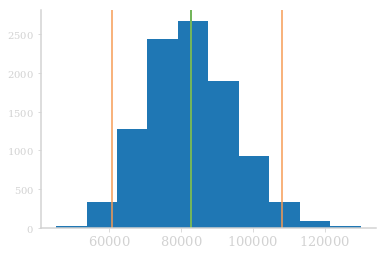

In [349]:
pyp.hist(boots['Group2']['Bootstraps']);
pyp.axvline(boots['Group2']['CI'][0],color=col['orange']);
pyp.axvline(boots['Group2']['CI'][1],color=col['orange']);
pyp.axvline(boots['Group2']['Center'],color=col['green'],lw=2);

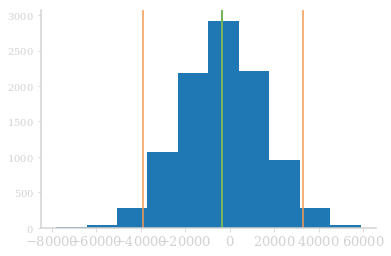

In [350]:
pyp.hist(boots['Effects']['Bootstraps']);
pyp.axvline(boots['Effects']['CI'][0],color=col['orange']);
pyp.axvline(boots['Effects']['CI'][1],color=col['orange']);
pyp.axvline(boots['Observed'],color=col['green'],lw=2);

0.8497


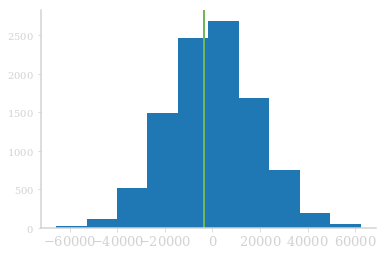

In [352]:
pyp.hist(boots['Bootstraps']);
pyp.axvline(boots['Observed'],color=col['green'],lw=2);
print(boots['Pvalue'])

## Results

We conclude that...

---

# Repeated Measures

In [221]:
# anova F_stat function
def fStat_oneway_RM(y,timeVector,SubjID,dof=False,flag=True):
  gs = np.unique(timeVector);
  subs = np.unique(SubjID);
  if len(gs) < 2:
    raise ValueError('Grouping vector must contain at least 2 time points for ANOVA!')
  # currently, oneway only accepts a single grouping vector
  if dof:
    dofB = len(gs)-1; #n time points - 1
    dofW = (len(subs)-1)*(len(gs)-1); # (Nsub-1)(Ntime-1)
  else:
    dofB = 1;
    dofW = 1;
  grandMu = np.mean(y);
  groupMus = ave(y,timeVector);
  if flag:    
    k = len(gs);
    subMus = [];
    for sbj in subs:
      subMus.append(np.mean(y[SubjID==sbj]));
    subMus = np.ravel(subMus);
  else:
    k=1;
    subMus = ave(y,SubjID);
  SSB = np.sum( (groupMus-grandMu)**2 ) / dofB;
  SSW = np.sum( (y-groupMus)**2 );
  SSSub = k*np.sum( (subMus-grandMu)**2 );
  SSE = (SSW - SSSub) / dofW;
  return SSB/SSE;

# bootstrap function
def boot_oneway_RM(y, timeVector, SubjID, dof=False, B=10000, flag = True):
  y = np.ravel(y);
  timeVector = np.ravel(timeVector);
  SubjID = np.ravel(SubjID);
  y_cent = y - ave(y,timeVector);
  F_observed = fStat_oneway_RM(y, timeVector, SubjID, dof=dof, flag=flag);
  uSubjs = np.unique(SubjID);
  F_null = np.zeros(B);
  for b in range(B):
    boot_subj = np.random.choice(uSubjs, len(uSubjs), replace=True);
    bootInds = [];
    for sj in boot_subj:
      bootInds.append(np.nonzero(SubjID == sj)[0]);
    bootInds = np.concatenate(bootInds);
    F_null[b] = fStat_oneway_RM(y_cent[bootInds],timeVector[bootInds], SubjID[bootInds],dof=dof,flag=flag);
  crit = np.percentile(F_null, q=95);
  pval = np.mean(F_null >= F_observed);
  return {
    'Bootstraps': F_null,
    'Observed': F_observed,
    'CritLevel': crit,
    'pvalue': pval
  };

In [222]:
weight = pd.read_csv('./data/WeightLoss.csv')
weight.set_index('Unnamed: 0', inplace=True);
weight.index.rename('INDEX',inplace=True)
weight

,group,wl1,wl2,wl3,se1,se2,se3
INDEX,,,,,,,
1,Control,4,3,3,14,13,15
2,Control,4,4,3,13,14,17
3,Control,4,3,1,17,12,16
4,Control,3,2,1,11,11,12
5,Control,5,3,2,16,15,14
6,Control,6,5,4,17,18,18
7,Control,6,5,4,17,16,19
8,Control,5,4,1,13,15,15
9,Control,5,4,1,14,14,15


In [223]:
esteem = pd.melt(
  weight, 
  id_vars=['group'], 
  value_vars = weight.columns[4:], 
  var_name='TimePoint', 
  value_name='Measure'
);
esteem
esteem['Subject'] = ave(esteem.Measure.values, esteem.group.values, esteem.TimePoint.values, FUN= lambda g: np.arange(len(g))+1)
e_DietX = esteem[esteem.group == 'DietEx']
e_DietX


,group,TimePoint,Measure,Subject
24,DietEx,se1,15,1
25,DietEx,se1,16,2
26,DietEx,se1,13,3
27,DietEx,se1,16,4
28,DietEx,se1,13,5
29,DietEx,se1,15,6
30,DietEx,se1,15,7
31,DietEx,se1,16,8
32,DietEx,se1,16,9
33,DietEx,se1,17,10


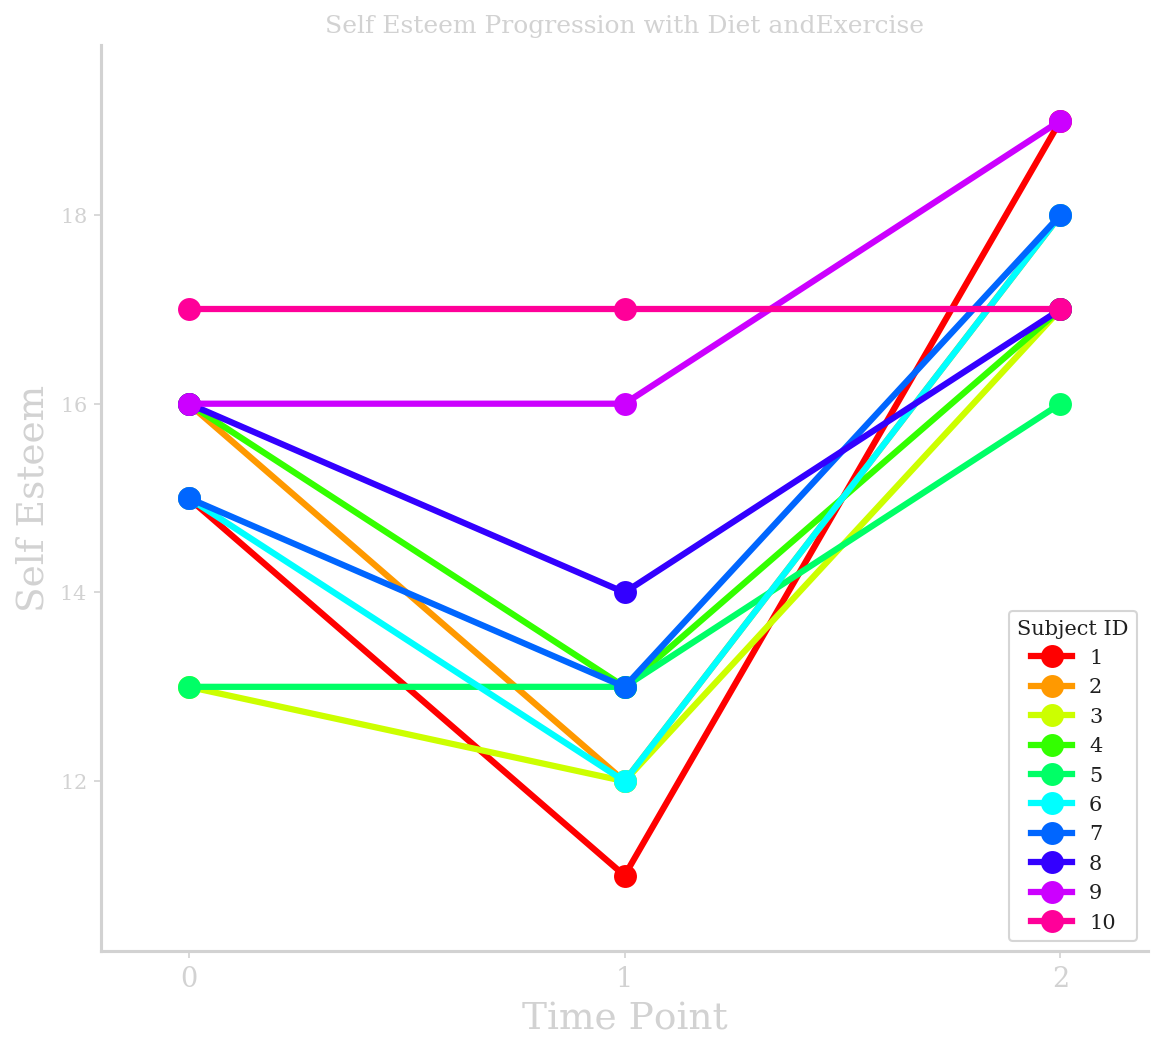

In [224]:
import statsmodels.graphics.factorplots as stm
import seaborn as sns

fig = pyp.figure(figsize=(9,8), dpi=150);
ax = fig.subplots();

stm.interaction_plot(
  e_DietX.TimePoint.values, 
  e_DietX.Subject.values, 
  e_DietX.Measure.astype(np.float64), 
  func=np.mean,
  ax=ax,
  plottype='both',
  xlabel="Time Point", 
  ylabel='Self Esteem',
  linewidth=3,
  markersize=20
);
leg = ax.get_legend();
leg.set_title('Subject ID');
ltl = leg.get_title();
ltl.set_color(col['dkGrey']);
for text in leg.get_texts():
    text.set_color(col['dkGrey']);
ax.set_xticklabels(['0', '1', '2']);
ax.set_ylabel('Self Esteem');
ax.set_title('Self Esteem Progression with Diet andExercise');

theCols = [];
for ll in leg.get_lines():
  theCols.append(ll.get_color());
theSubjs = np.unique(e_DietX.Subject.values);

ax.patch.set_alpha(0);

fig.savefig('../img/AOV_1wayRM_IPlot.svg', transparent=True);

In [225]:
dietAOV = boot_oneway_RM(e_DietX.Measure.astype(np.float64), e_DietX.TimePoint.values, e_DietX.Subject.astype(np.str), dof=True, flag=True);

In [229]:
e_DietX.TimePoint.values

array(['se1', 'se1', 'se1', 'se1', 'se1', 'se1', 'se1', 'se1', 'se1',
       'se1', 'se2', 'se2', 'se2', 'se2', 'se2', 'se2', 'se2', 'se2',
       'se2', 'se2', 'se3', 'se3', 'se3', 'se3', 'se3', 'se3', 'se3',
       'se3', 'se3', 'se3'], dtype=object)

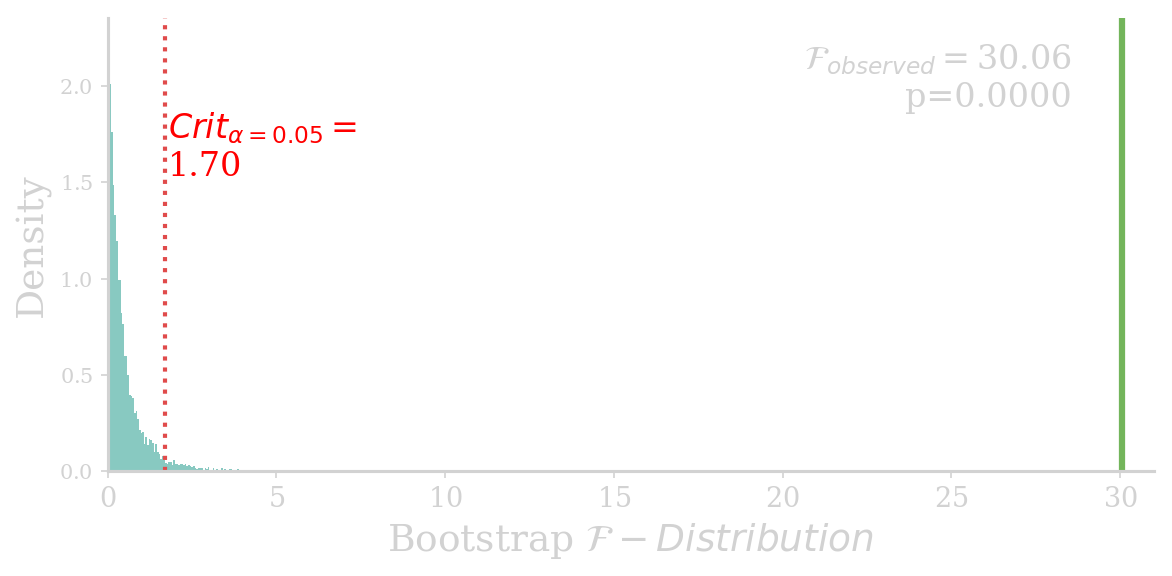

In [255]:
# plot bootstrap
fig,ax = pyp.subplots(figsize=(9,4), dpi=150);

ax.hist(dietAOV['Bootstraps'], bins = 'fd', color=col['blue'],density=True);
ax.axvline(dietAOV['Observed'], color=col['green'], lw=3);
ax.axvline(dietAOV['CritLevel'], color = col['red'], lw=2, ls=':');
ax.text(dietAOV['CritLevel']*1.05,ax.get_ylim()[1]*0.8, r'$Crit_{\alpha = 0.05}=$'+f"\n{dietAOV['CritLevel']:.2f}", color='red', size=16,ha='left',va='top');
ax.text(dietAOV['Observed']*0.95, ax.get_ylim()[1]*0.95, r'$\mathcal{F}_{observed}=$'+f"{dietAOV['Observed']:0.2f}\np={dietAOV['pvalue']:0.4f}",size=16,ha='right',va='top');
ax.set_xlabel(r'Bootstrap $\mathcal{F}-Distribution$');
ax.set_ylabel('Density');
ax.patch.set_alpha(0);
ax.set_xlim((0,31));

fig.savefig('../img/AOV_1wayRM_Null.svg', transparent=True)

In [227]:
dietAOV2 = boot_oneway_RM(e_DietX.Measure.astype(np.float64), e_DietX.TimePoint.values, e_DietX.Subject.astype(np.str), dof=True, flag=False);

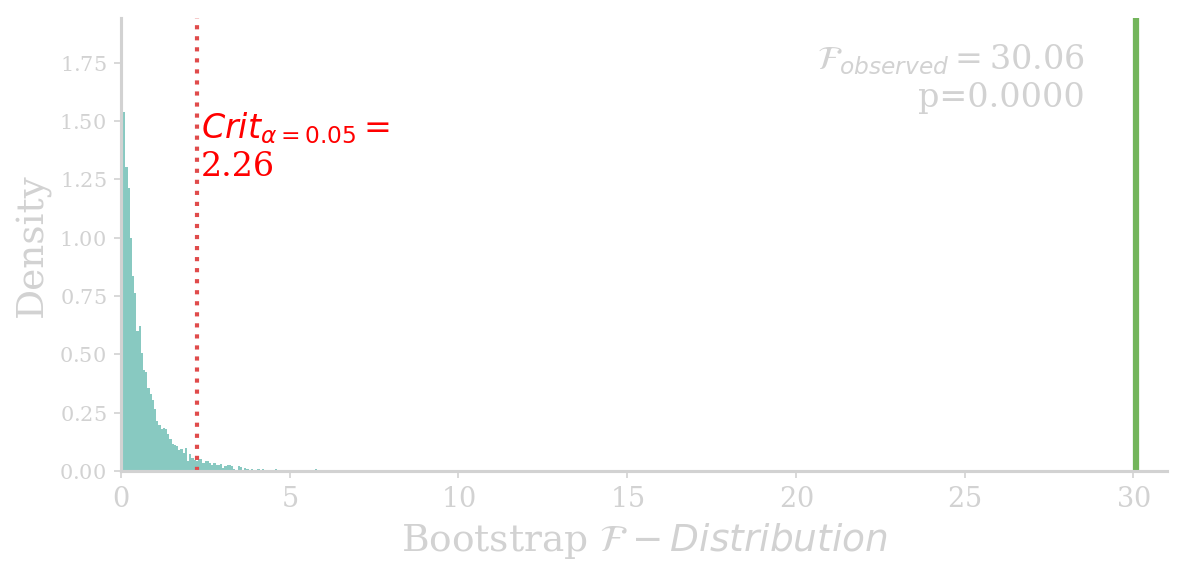

In [228]:
# plot bootstrap
fig,ax = pyp.subplots(figsize=(9,4), dpi=150);

ax.hist(dietAOV2['Bootstraps'], bins = 'fd', color=col['blue'],density=True);
ax.axvline(dietAOV2['Observed'], color=col['green'], lw=3);
ax.axvline(dietAOV2['CritLevel'], color = col['red'], lw=2, ls=':');
ax.text(
  dietAOV2['CritLevel']*1.05,
  ax.get_ylim()[1]*0.8, r'$Crit_{\alpha = 0.05}=$'+f"\n{dietAOV2['CritLevel']:.2f}", 
  color='red', 
  size=16,
  ha='left',
  va='top'
);
ax.text(
  dietAOV2['Observed']*0.95, 
  ax.get_ylim()[1]*0.95, 
  r'$\mathcal{F}_{observed}=$'+f"{dietAOV2['Observed']:0.2f}\np={dietAOV2['pvalue']:0.4f}",
  size=16,
  ha='right',
  va='top'
);
ax.set_xlabel(r'Bootstrap $\mathcal{F}-Distribution$');
ax.set_ylabel('Density');
ax.patch.set_alpha(0);
ax.set_xlim((0,31));
